In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv('wage-data-coast.csv')
df.head()

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1


In [26]:
min_salarys = df[df['Salary'] > 0].groupby('Year')['Salary'].agg('min')
mean_salarys = df.groupby('Year')['Salary'].agg('mean')
max_salarys = df.groupby('Year')['Salary'].agg('max')


In [64]:
# list(range(df['Year'].min(), df['Year'].max() + 1, 5))
x_range = [x for x in range(df['Year'].min(), df['Year'].max() + 1, 1) if x%5 == 0]
x_range = x_range[1:-1]
x_range.insert(0, df['Year'].min())
x_range.append(df['Year'].max())
x_range

[1968, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2017]

([<matplotlib.axis.XTick at 0x23cd0cdf310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

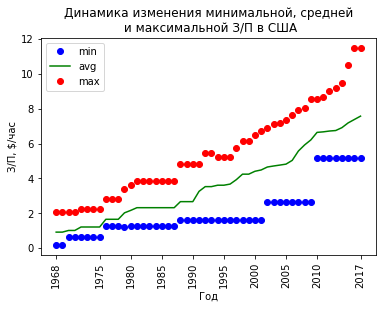

In [65]:
plt.plot(min_salarys, 'bo', label='min')
plt.plot(mean_salarys, 'g-', label='avg')
plt.plot(max_salarys, 'ro', label='max')
plt.title('Динамика изменения минимальной, средней\n и максимальной З/П в США')
plt.xlabel('Год')
plt.ylabel('З/П, $/час')
plt.legend()
plt.xticks(x_range, rotation = 90)

([<matplotlib.axis.YTick at 0x23cd25c5820>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

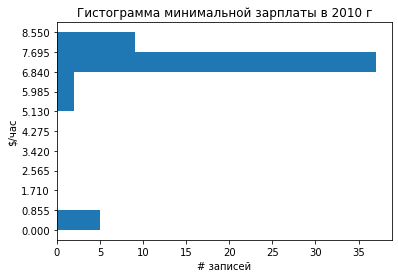

In [86]:
series = df[df['Year'] == 2010]['Salary']
bins_count = 10
bins_width = np.round(series.max() / bins_count, 3)
x_range = [i * bins_width for i in range(bins_count + 1)]


plt.hist(series, bins=bins_count, orientation='horizontal')
plt.title('Гистограмма минимальной зарплаты в 2010 г')
plt.ylabel('$/час')
plt.xlabel('# записей')
plt.yticks(x_range)

Text(0, 0.5, '$/час')

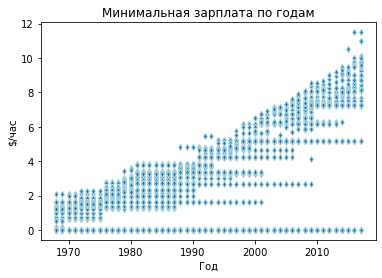

In [99]:
plt.scatter(df['Year'], df['Salary'], edgecolors='lightblue', s=20, marker='d', linewidths=1)

plt.title('Минимальная зарплата по годам')
plt.xlabel('Год')
plt.ylabel('$/час')

Text(0, 0.5, '$/час')

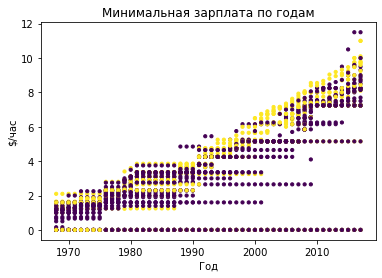

In [109]:
plt.scatter(df['Year'], df['Salary'], c=df['IsCoastal'], s=10)
    # edgecolors='lightblue', s=20, marker='d', linewidths=1)

plt.title('Минимальная зарплата по годам')
plt.xlabel('Год')
plt.ylabel('$/час')

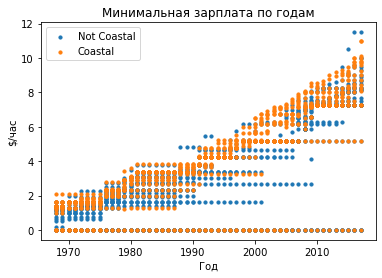

In [110]:
df0 = df[df['IsCoastal'] == 0]
df1 = df[df['IsCoastal'] == 1]
plt.scatter(df0['Year'], df0['Salary'], label = 'Not Coastal', s=10)
plt.scatter(df1['Year'], df1['Salary'], label = 'Coastal', s=10)
    # edgecolors='lightblue', s=20, marker='d', linewidths=1)

plt.title('Минимальная зарплата по годам')
plt.xlabel('Год')
plt.ylabel('$/час')
plt.legend()

In [116]:
df[df['Year'] == 2017].sort_values(by='Salary', ascending=False).head(3)

,Year,State,Salary,IsCoastal
2703,2017,District of Columbia,11.5,0
2746,2017,Washington,11.0,1
2718,2017,Massachusetts,11.0,1


([<matplotlib.axis.XTick at 0x23cd52023a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

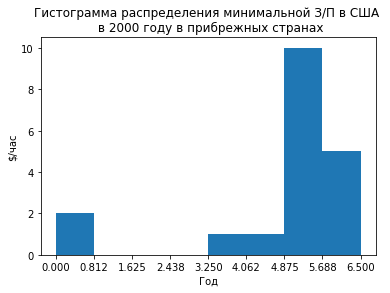

In [132]:
p_year = 2000
series = df[(df['Year'] == p_year) & (df['IsCoastal'] == 1)]['Salary']

bins_count = 8
bins_width = series.max() / bins_count
x_range = [i * bins_width for i in range(bins_count + 1)]

plt.hist(series, bins=bins_count)
plt.title(f'Гистограмма распределения минимальной З/П в США \n в {p_year} году в прибрежных странах')
plt.xlabel('Год')
plt.ylabel('$/час')
plt.xticks(x_range)

In [135]:
df_1 = df[df['Year'] == 2015].groupby('IsCoastal')['Salary'].mean().sort_values(ascending=False).reset_index()
df_1

,IsCoastal,Salary
0,1,7.760526
1,0,6.882778


In [136]:
df_1['IsCoastalStr'] = np.where(df_1['IsCoastal'] == 1, 'Coastal', 'Not coastal')
df_1

,IsCoastal,Salary,IsCoastalStr
0,1,7.760526,Coastal
1,0,6.882778,Not coastal


Text(0.5, 0, '$/час')

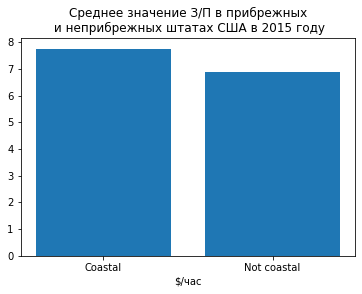

In [138]:
plt.bar(df_1['IsCoastalStr'], df_1['Salary'])

plt.title('Среднее значение З/П в прибрежных\n и неприбрежных штатах США в 2015 году')
plt.xlabel('Тип штата')
plt.xlabel('$/час')

<BarContainer object of 25 artists>

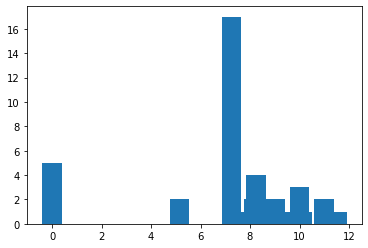

In [147]:
df0 = df[df['Year'] == 2017].groupby('Salary')['State'].count().reset_index().sort_values('Salary')

plt.bar(df0['Salary'], df0['State'])

# данный вариант использования bar вместо hist неоднозначен, т.к. стаканы не одинаковой ширины - интерпретация таких данных затруднена. Для примера ниже вариант с диаграимой типа гистогорамма

(array([ 5.,  0.,  0.,  0.,  2.,  0., 19., 15., 11.,  3.]),
 array([ 0.  ,  1.15,  2.3 ,  3.45,  4.6 ,  5.75,  6.9 ,  8.05,  9.2 ,
        10.35, 11.5 ]),
 <BarContainer object of 10 artists>)

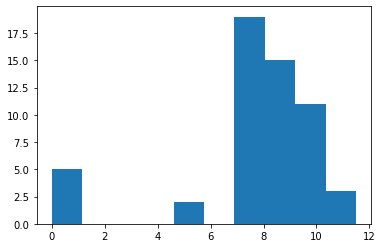

In [145]:
df1 = df[df['Year'] == 2017]

plt.hist(df1['Salary'], bins=10)

In [199]:
x = 10.23
f'{x:.2f}% {x*2:.0f}'

'10.23% 20'

     IsCoastal  State
0  Not Coastal     36
1      Coastal     19


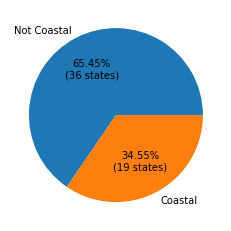

In [209]:
df_1 = df.groupby('IsCoastal')['State'].nunique().reset_index().replace({'IsCoastal': {0: 'Not Coastal', 1: 'Coastal'}})
print(df_1)
# df_1['State'].sum()
values = df_1['State']
labels = df_1['IsCoastal']
plt.pie(values, labels=labels,autopct=lambda x: f'{x:1.2f}%\n({x*values.sum()/100:.0f} states)')
plt.show()

      Year        State  Salary  IsCoastal
1799  2000       Oregon    6.50          1
1811  2000   Washington    6.50          1
1766  2000  Connecticut    6.15          1


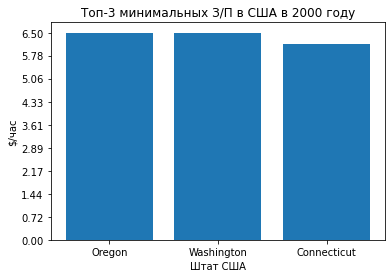

In [249]:
df1 = df[df['Year'].eq(2000)].sort_values('Salary', ascending=False).head(3)
print(df1)

plt.bar(x=df1['State'], height=df1['Salary'])
plt.title('Топ-3 минимальных З/П в США в 2000 году')
plt.xlabel('Штат США')
plt.ylabel('$/час')
plt.yticks(list(map(lambda x: np.round(x, 2), np.linspace(0, df1['Salary'].max(), 10))))
plt.show()